In [ ]:
from keras.datasets import cifar100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale, StandardScaler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,Y_train),(X_test,Y_test)=cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Y_train.shape

(50000, 1)

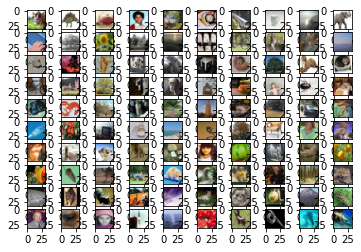

In [ ]:
for i in range (100):
    plt.subplot(10,10 ,i+ 1)
    plt.imshow(X_train[ i ])
plt.show()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train/=255
X_test/=255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_train.shape

(50000, 1)

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
Y_train = to_categorical(Y_train,100)
Y_test = to_categorical(Y_test,100)

In [ ]:
Y_train.shape

(50000, 100)

In [ ]:
Y_train.shape

(50000, 100)

In [ ]:
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D

In [ ]:
model  = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=150,verbose=1, validation_data=(X_test,Y_test))

Epoch 1/150
782/782 [==============================] - 8s 10ms/step - loss: 4.1961 - accuracy: 0.0606 - val_loss: 3.7730 - val_accuracy: 0.1170
Epoch 2/150
782/782 [==============================] - 8s 10ms/step - loss: 3.4146 - accuracy: 0.1784 - val_loss: 3.1596 - val_accuracy: 0.2198
Epoch 3/150
782/782 [==============================] - 8s 10ms/step - loss: 2.8988 - accuracy: 0.2718 - val_loss: 2.8070 - val_accuracy: 0.2935
Epoch 4/150
782/782 [==============================] - 8s 10ms/step - loss: 2.5006 - accuracy: 0.3528 - val_loss: 2.6392 - val_accuracy: 0.3371
Epoch 5/150
782/782 [==============================] - 8s 10ms/step - loss: 2.0736 - accuracy: 0.4492 - val_loss: 2.7502 - val_accuracy: 0.3358
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 1.5823 - accuracy: 0.5617 - val_loss: 2.7442 - val_accuracy: 0.3462
Epoch 7/150
782/782 [==============================] - 8s 10ms/step - loss: 1.0602 - accuracy: 0.6940 - val_loss: 3.2689 - val_accuracy:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('cifar100.h5')


In [ ]:
from keras.saving.save import load_model
model1 =load_model('cifar100.h5')
from keras.preprocessing.image import load_img, img_to_array

array([9])

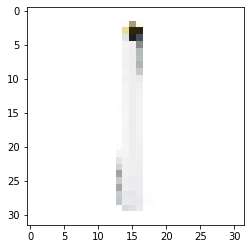

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/bottles.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([35])

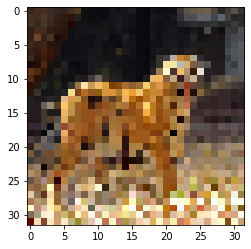

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/tiger.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([61])

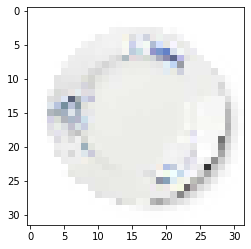

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/plate.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([87])

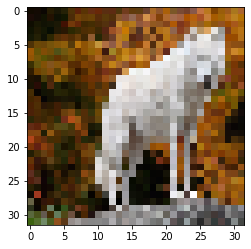

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/wolf.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([9])

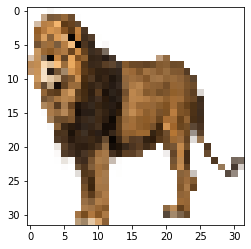

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/lion.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([92])

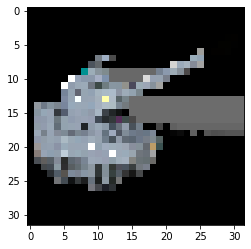

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/tank.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)

array([49])

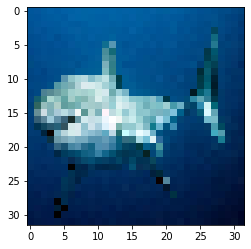

In [ ]:
img=load_img('/content/drive/MyDrive/cifar100/shark.png',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=1)